In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib_inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("data-export (1).csv")


-->> Data cleaning

In [3]:
df.columns = ['channel group' , 'datehour' ,'Users','Sessions','Engaged sessions','Average engagement time per session','Engaged sessions per user','Events per session','Engagement rate','Event count']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   channel group                        3182 non-null   object 
 1   datehour                             3182 non-null   int64  
 2   Users                                3182 non-null   int64  
 3   Sessions                             3182 non-null   int64  
 4   Engaged sessions                     3182 non-null   int64  
 5   Average engagement time per session  3182 non-null   float64
 6   Engaged sessions per user            3182 non-null   float64
 7   Events per session                   3182 non-null   float64
 8   Engagement rate                      3182 non-null   float64
 9   Event count                          3182 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 248.7+ KB


In [5]:
df['datehour'] = pd.to_datetime(df['datehour'],format='%Y%m%d%H',errors='coerce')

In [6]:
df.isnull().sum()

channel group                          0
datehour                               0
Users                                  0
Sessions                               0
Engaged sessions                       0
Average engagement time per session    0
Engaged sessions per user              0
Events per session                     0
Engagement rate                        0
Event count                            0
dtype: int64

In [7]:
df['hour'] = df['datehour'].dt.hour
df['month'] = df ['datehour'].dt.month_name()
df['Day'] = df ['datehour'].dt.day_name()

In [8]:
df.describe()

,datehour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


In [9]:
df.head()

,channel group,datehour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour,month,Day
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23,April,Tuesday
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19,April,Wednesday
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23,April,Wednesday
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18,April,Wednesday
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20,April,Wednesday


-->> Insight Generation

◾ Number of user per hour

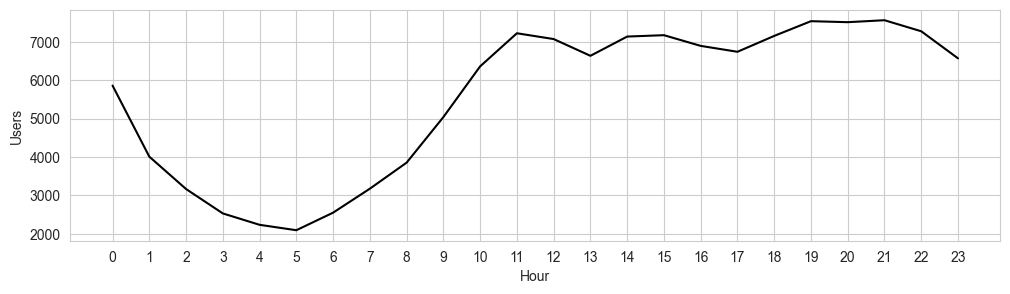

In [10]:
plt.figure(figsize=(12,3))
sns.set_style(style='whitegrid')
ax = sns.lineplot(data=df,x='hour',y='Users',legend=False,dashes=False,estimator='sum',errorbar=None, color='black')
ax.set_xticks(range(24))
ax.set_xlabel('Hour')
ax.set_ylabel('Users')
sns.set_style(style='whitegrid')


<Axes: xlabel='Day', ylabel='Users'>

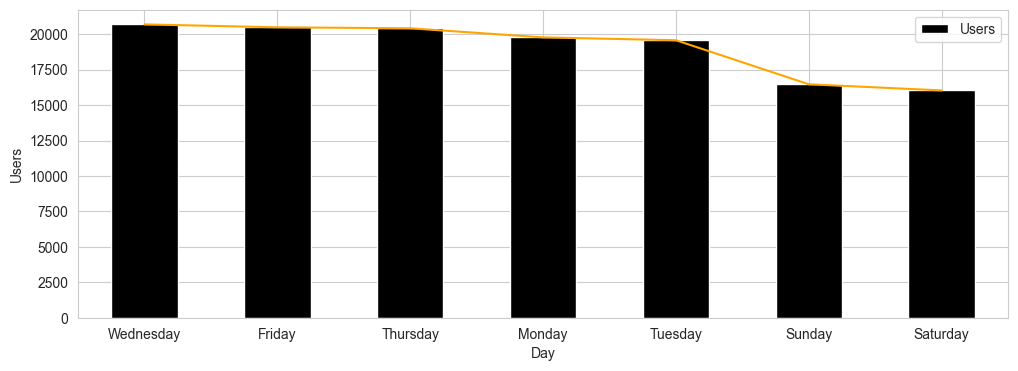

In [85]:
plt.figure(figsize=(12,4))
ax =df.groupby(by='Day')['Users'].sum().sort_values(ascending=False)
ax.plot(kind='bar',color='black')
plt.xticks(rotation=0)
sns.lineplot(data=ax,color='orange')


Sessions and Users Over time

Text(0.5, 0, 'DateHour')

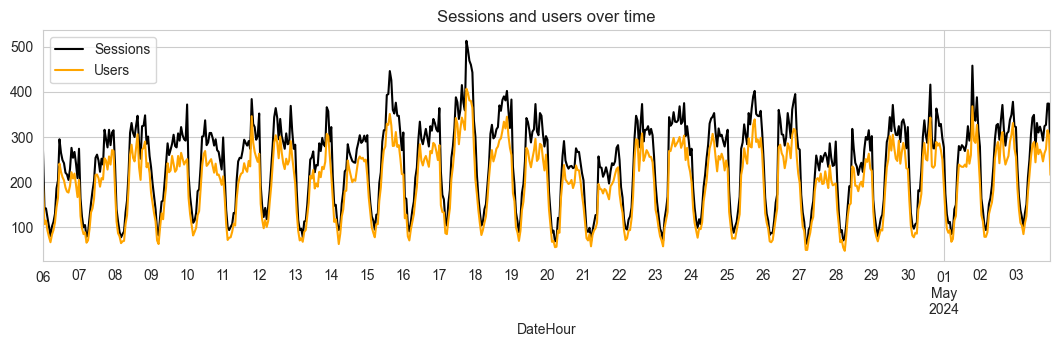

In [11]:
plt.figure(figsize=(13,3))
df.groupby(by='datehour')[['Sessions','Users']].sum().plot(ax=plt.gca(),color=['black','orange'])
plt.title('Sessions and users over time')
plt.xlabel('DateHour')


Total users by channel

<Axes: xlabel='channel group', ylabel='Users'>

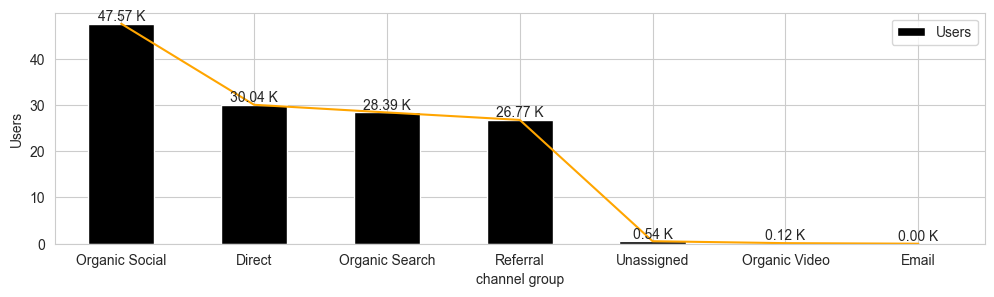

In [68]:
plt.figure(figsize=(12,3))
ax=(df.groupby(by='channel group')['Users'].sum().sort_values(ascending=False)/1000).plot(kind='bar',ax=plt.gca(),color='black')
plt.xticks(rotation=0)
for c in ax.containers:
    ax.bar_label(c,labels=[f'{v:.2f} K' for v in c.datavalues])
sns.lineplot(data=df.groupby(by='channel group')['Users'].sum().sort_values(ascending=False)/1000,color='orange')


Average Engagement time by channel

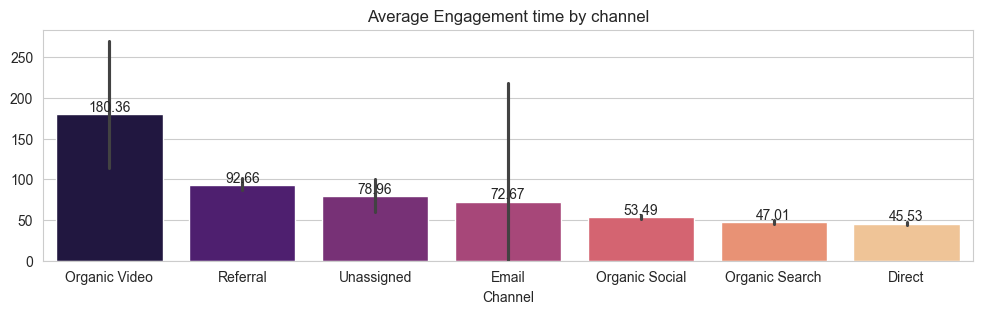

In [13]:
plt.figure(figsize=(12,3))
order = df.groupby(by='channel group')['Average engagement time per session'].mean().sort_values(ascending=False).index
ax= sns.barplot(data=df , x='channel group' , y='Average engagement time per session' , estimator=np.mean, order=order , palette='magma' , ax=plt.gca())
plt.title('Average Engagement time by channel')
plt.xlabel('Channel')
plt.ylabel('')
for c in ax.containers:
    ax.bar_label(c,fmt='%.2f')

Emgagement rate across differnt Channel Group

Text(0.5, 0, 'Channel')

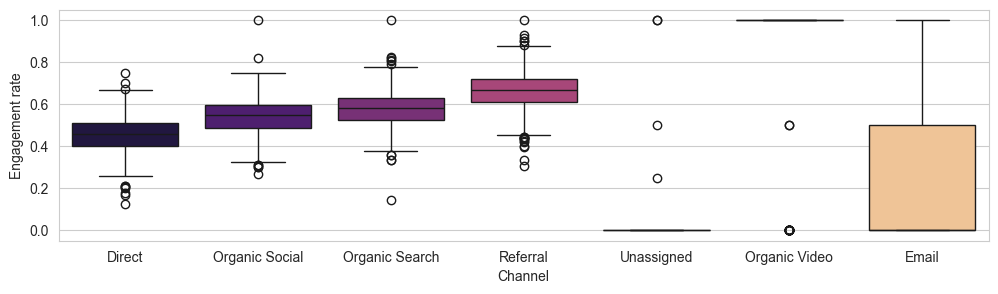

In [14]:
plt.figure(figsize=(12,3))
sns.boxplot(data=df , x='channel group' , y='Engagement rate', palette='magma')
plt.xlabel('Channel')

Engaged vs NON-Engaged Sessons

Text(0.5, 1.0, 'Engaged Sessions vs NON-Engaged Sessions')

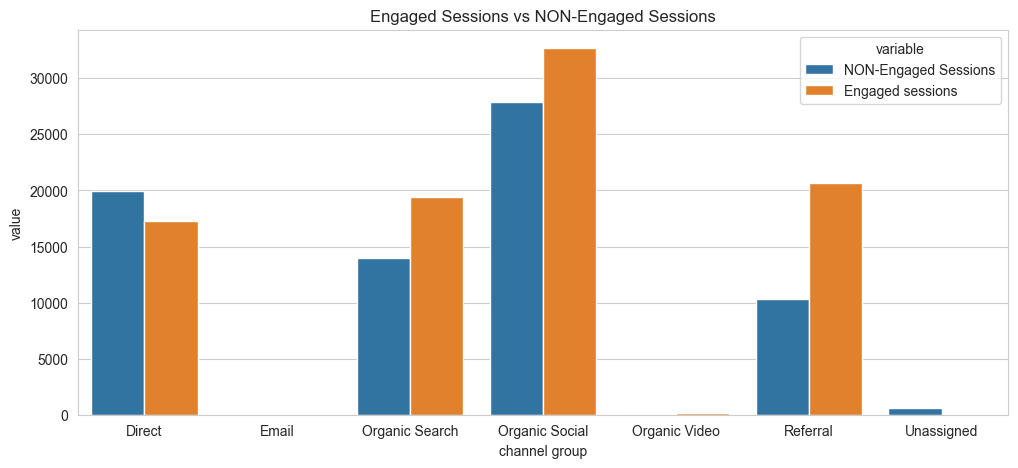

In [15]:
sessions_df= df.groupby(by='channel group')[['Sessions' ,'Engaged sessions']].sum().reset_index()
sessions_df['NON-Engaged Sessions']=sessions_df['Sessions']-sessions_df['Engaged sessions']
sessions_df_melt=sessions_df.melt(id_vars='channel group',value_vars=['NON-Engaged Sessions','Engaged sessions'])

plt.figure(figsize=(12,5))
sns.barplot(sessions_df_melt , x='channel group' , y='value' , hue='variable')
plt.title('Engaged Sessions vs NON-Engaged Sessions')

Traffic by Hour and Channel

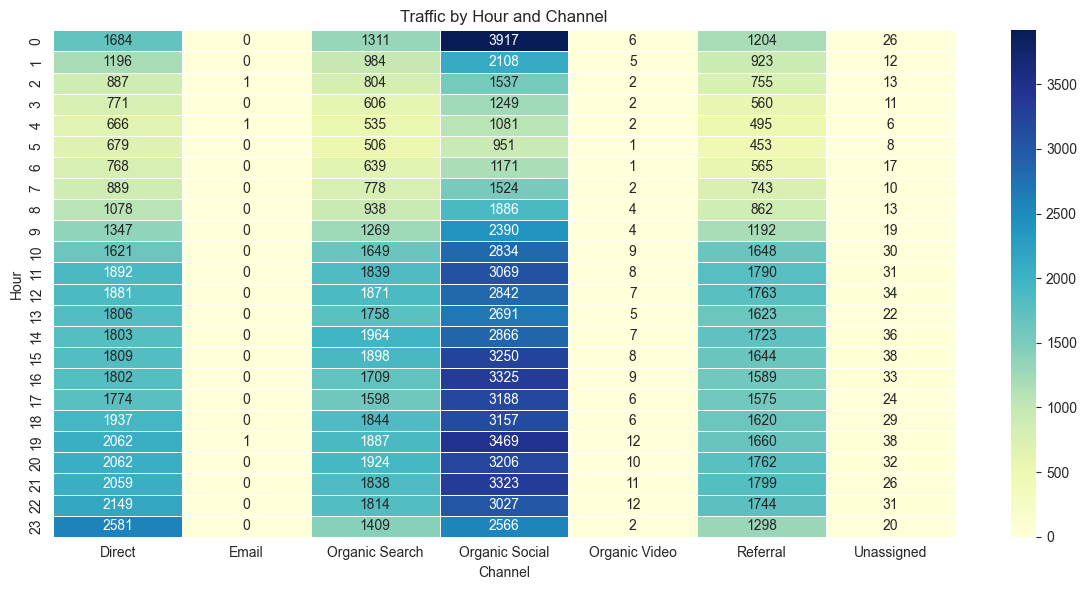

In [16]:
heatmap_data = df.groupby(by=['hour' , 'channel group'])['Sessions'].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data ,cmap='YlGnBu' ,linewidth=0.5,annot=True,fmt='0.0f')
plt.title('Traffic by Hour and Channel')
plt.xlabel('Channel')
plt.ylabel('Hour')
plt.tight_layout()

Engagement rate and Session over time

<Axes: xlabel='Engagement rate', ylabel='Sessions'>

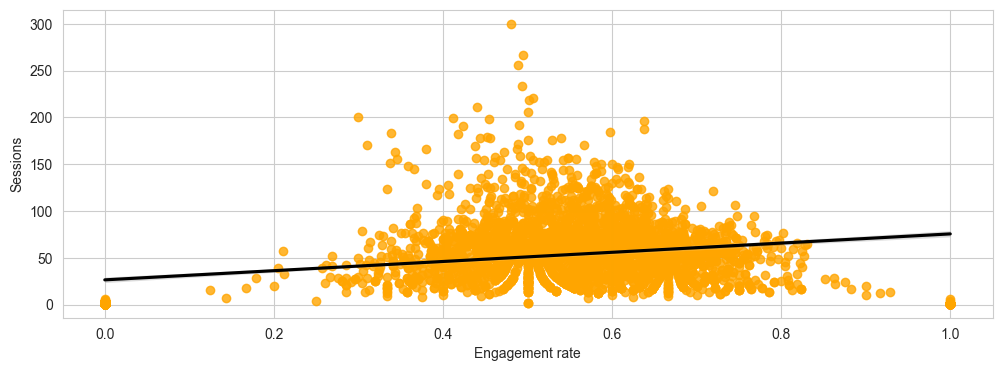

In [57]:
plt.figure(figsize=(12,4))
sns.regplot(data=df,x='Engagement rate' , y='Sessions',color='orange',scatter_kws={'color':'orange'},line_kws={'color':'black'})


Total Engagement Sessions w/r Day and Hour

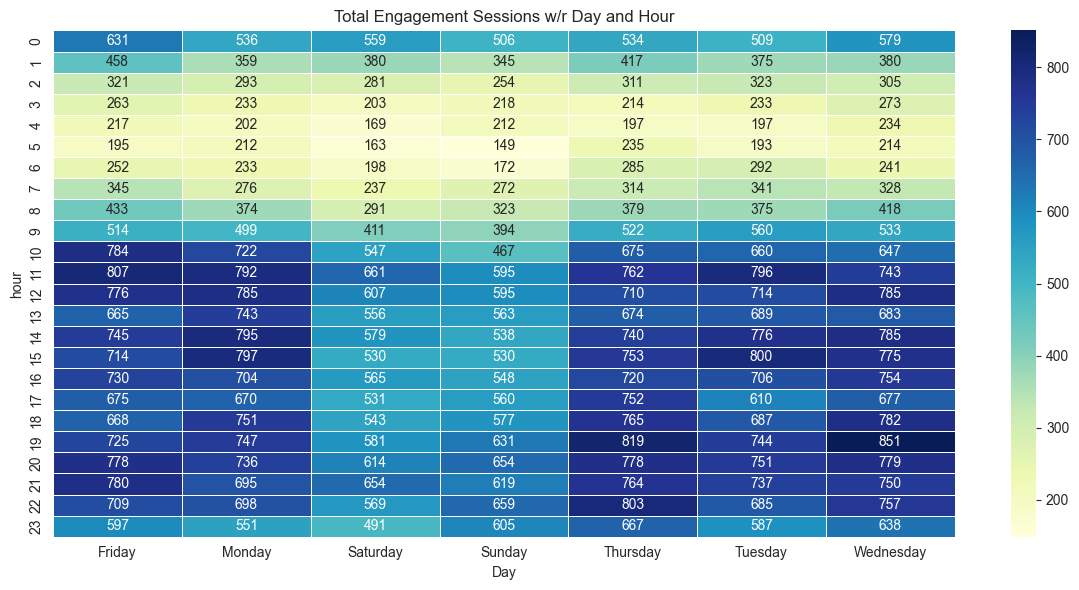

In [54]:
plt.figure(figsize=(12,6))
pivot_df1=df.pivot_table(index='hour',columns='Day',values='Engaged sessions',aggfunc='sum')
sns.heatmap(data=pivot_df,annot=True,cmap='YlGnBu',linewidths=0.5,fmt='0.0f')
plt.title('Total Engagement Sessions w/r Day and Hour')
plt.tight_layout()